# 1. Install and Import Dependencies

In [1]:
%pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [33]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Hari Shiman/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-1-17 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)



100%|██████████| 14.0M/14.0M [00:06<00:00, 2.17MB/s]


Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [9]:
img = 'https://images.unsplash.com/photo-1552519507-da3b142c6e3d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8MjAyMCUyMGNhcnN8ZW58MHx8MHx8&w=1000&q=80'

In [10]:
results = model(img)
results.print()

image 1/1: 667x1000 1 car
Speed: 121.0ms pre-process, 30.1ms inference, 30.5ms NMS per image at shape (1, 3, 448, 640)


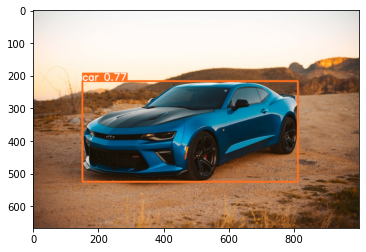

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
results.render()

[array([[[215, 215, 215],
         [215, 215, 215],
         [215, 215, 215],
         ...,
         [211, 215, 214],
         [211, 215, 214],
         [211, 215, 214]],
 
        [[215, 215, 215],
         [215, 215, 215],
         [215, 215, 215],
         ...,
         [212, 216, 215],
         [211, 215, 214],
         [211, 215, 214]],
 
        [[215, 215, 213],
         [215, 215, 213],
         [215, 215, 213],
         ...,
         [212, 216, 215],
         [212, 216, 215],
         [211, 215, 214]],
 
        ...,
 
        [[ 87,  51,  35],
         [ 86,  50,  34],
         [ 88,  53,  34],
         ...,
         [ 52,  34,  22],
         [ 50,  33,  25],
         [ 47,  32,  25]],
 
        [[ 87,  51,  35],
         [ 86,  50,  34],
         [ 88,  53,  34],
         ...,
         [ 50,  33,  23],
         [ 46,  33,  25],
         [ 43,  32,  28]],
 
        [[ 85,  52,  35],
         [ 85,  52,  35],
         [ 89,  54,  35],
         ...,
         [ 47,  33,  22],
  

# 4. Real Time Detections

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [3]:
import uuid   # Unique identifier
import os
import time

In [17]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['attentive', 'not attentive']
number_imgs = 20

In [18]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [19]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\attentive.6b4c6cb0-8696-11ec-9a60-80fa5b9b77be.jpg


In [20]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\attentive.6d32f725-8696-11ec-b14a-80fa5b9b77be.jpg
data\images\attentive.6d32f726-8696-11ec-8fcc-80fa5b9b77be.jpg
data\images\attentive.6d32f727-8696-11ec-9877-80fa5b9b77be.jpg
data\images\attentive.6d32f728-8696-11ec-9d9e-80fa5b9b77be.jpg
data\images\attentive.6d331de9-8696-11ec-bfa8-80fa5b9b77be.jpg
data\images\attentive.6d331dea-8696-11ec-bccf-80fa5b9b77be.jpg
data\images\attentive.6d331deb-8696-11ec-8923-80fa5b9b77be.jpg
data\images\attentive.6d331dec-8696-11ec-ac2f-80fa5b9b77be.jpg
data\images\attentive.6d331ded-8696-11ec-b3c2-80fa5b9b77be.jpg
data\images\attentive.6d331dee-8696-11ec-a7eb-80fa5b9b77be.jpg
data\images\attentive.6d331def-8696-11ec-a461-80fa5b9b77be.jpg
data\images\attentive.6d331df0-8696-11ec-8178-80fa5b9b77be.jpg
data\images\attentive.6d331df1-8696-11ec-b95b-80fa5b9b77be.jpg
data\images\attentive.6d331df2-8696-11ec-9e6f-80fa5b9b77be.jpg
data\images\attentive.6d331df3-8696-11ec-b983-80fa5b9b77be.jpg
data\images\attentive.6d33450a-8696-11ec-895f-80fa5b9b7

In [21]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [22]:
%pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Hari Shiman\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [15]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [ ]:
git clone https://github.com/ultralytics/yolov5

In [16]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt --workers 0

Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  2022-2-5 torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

# 6. Load Custom Model

In [32]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Hari Shiman/.cache\torch\hub\master.zip
YOLOv5  2022-2-6 torch 1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [25]:
img = os.path.join('data', 'images', 'attentive.0b1be2c3-8696-11ec-941a-80fa5b9b77be.jpg')

In [26]:
results = model(img)

In [30]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 4.0ms pre-process, 11.0ms inference, 4.0ms NMS per image at shape (1, 3, 480, 640)


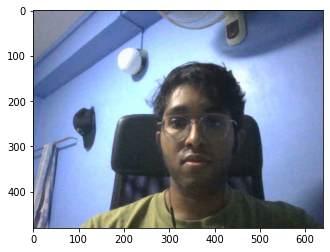

In [31]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()